In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [11]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [14]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [15]:
df['State_Name'].value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [17]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crop_Data.csv")
df2.head()

,Unnamed: 0,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


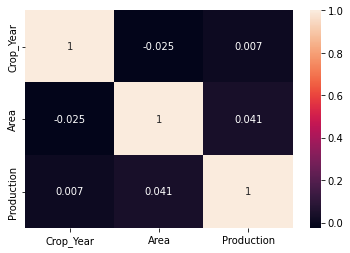

In [18]:
corr = df.corr()
sn.heatmap(corr, annot = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e9136b9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e9136ea10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e91376a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e91376510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e9136bf50>,
  <matplotlib.lines.Line2D at 0x7f7e9136e4d0>]}

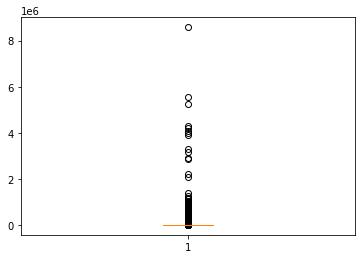

In [19]:
plt.boxplot(df.Area)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7e9180f850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7e91317450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e91307f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e91330a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7e91376850>,
  <matplotlib.lines.Line2D at 0x7f7e9131a110>]}

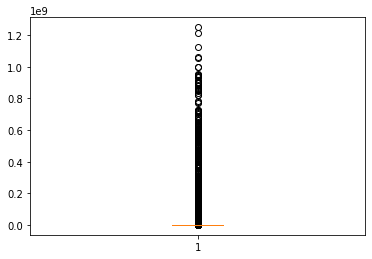

In [20]:
plt.boxplot(df.Production)

In [21]:
Prod = df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


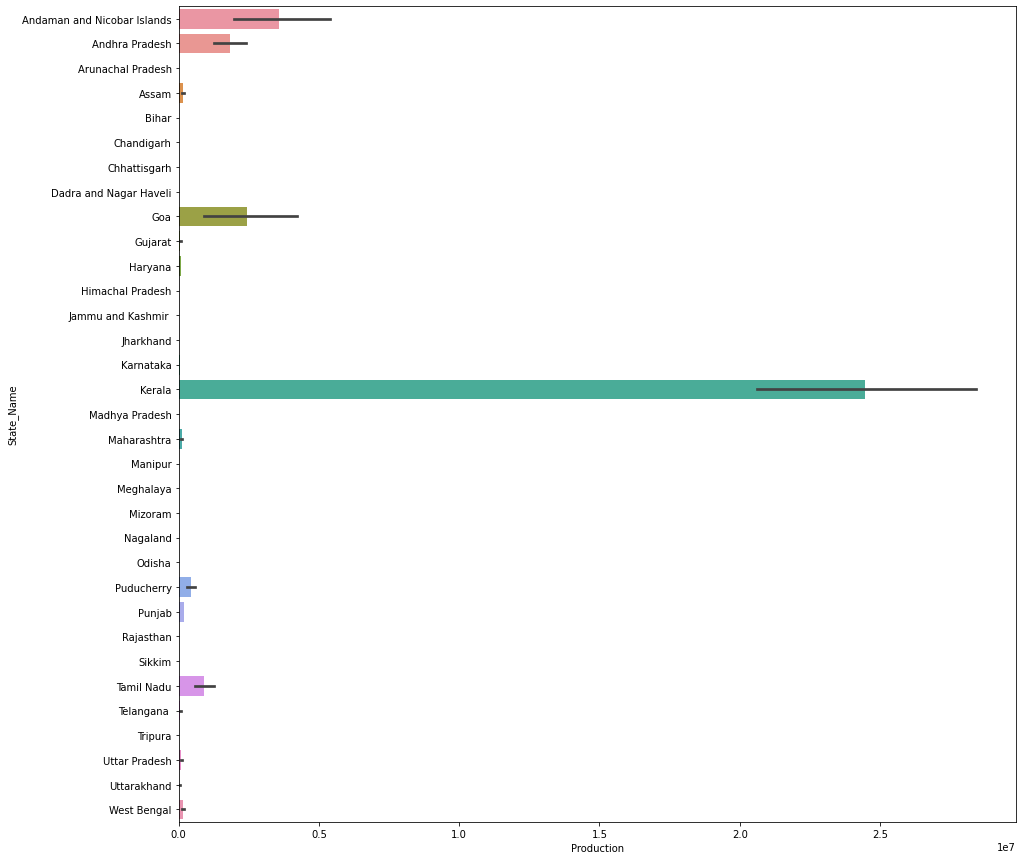

In [22]:
plt.figure(figsize= (15,15))
sn.barplot(x=df['Production'],y= df["State_Name"], orient='h');


# Creating Zones 

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [25]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [27]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [28]:
df["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

In [29]:
data_explore = df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Zone-Wise Production: Total')

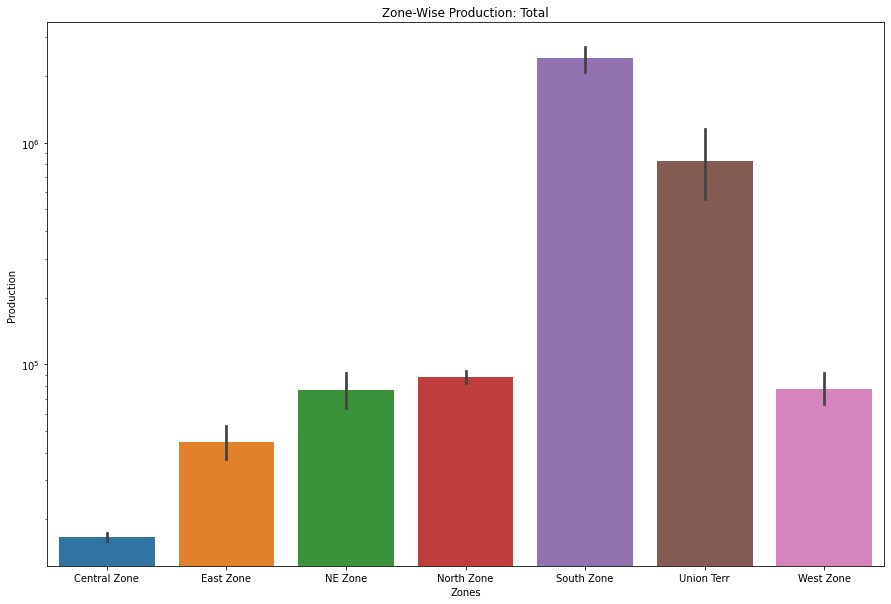

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
sn.barplot(data_explore.Zones.sort_values(ascending=True), data_explore.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Southern-Zone Production')

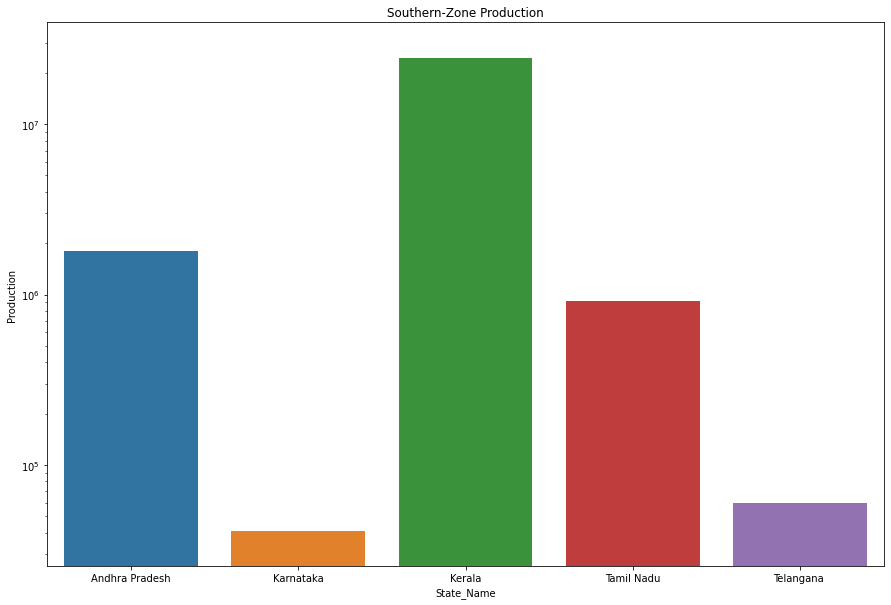

In [31]:
south_zone =  data_explore[(data_explore["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sn.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Year-Wise Production: Total')

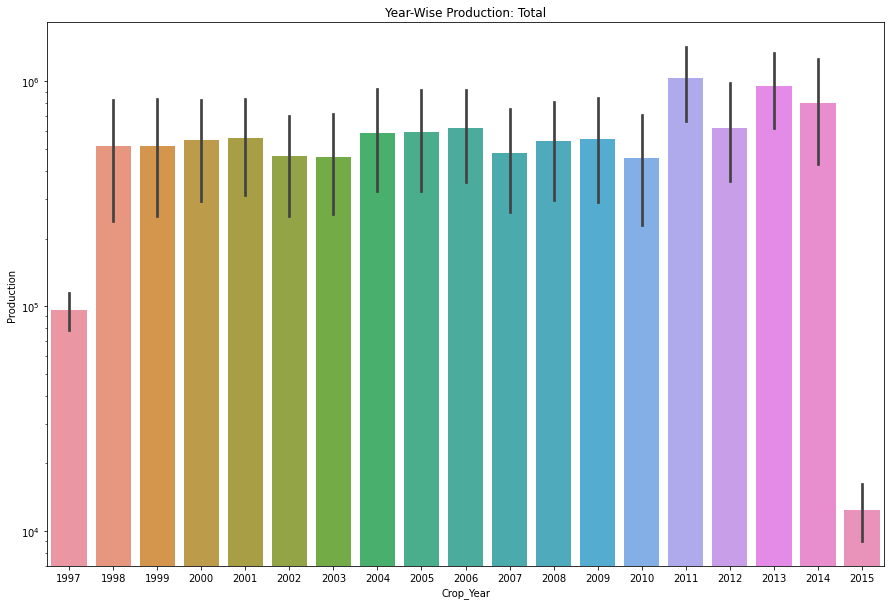

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sn.barplot(data_explore.Crop_Year, data_explore.Production)
plt.yscale('log')
plt.title('Year-Wise Production: Total')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Year-Wise Production: Total')

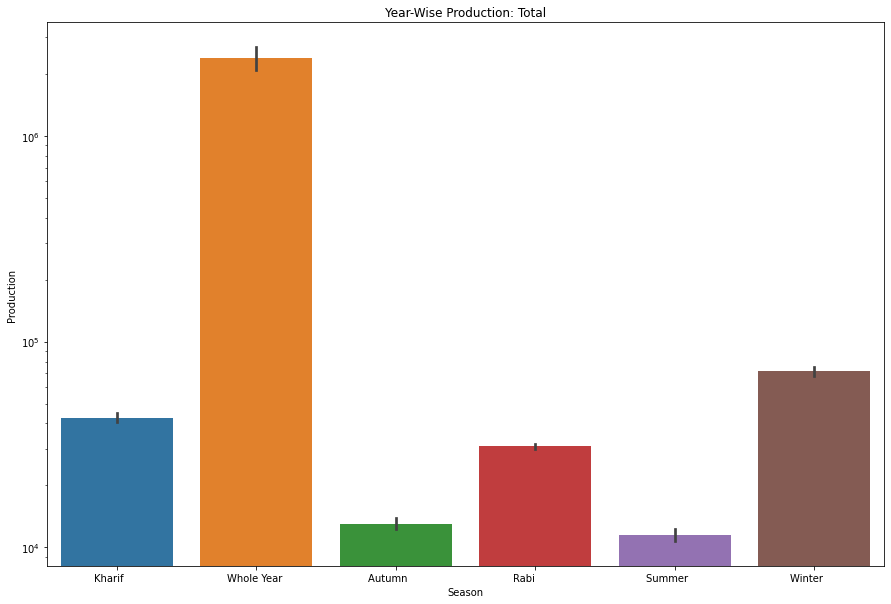

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
sn.barplot(data_explore.Season, data_explore.Production)
plt.yscale('log')
plt.title('Year-Wise Production: Total')

Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons

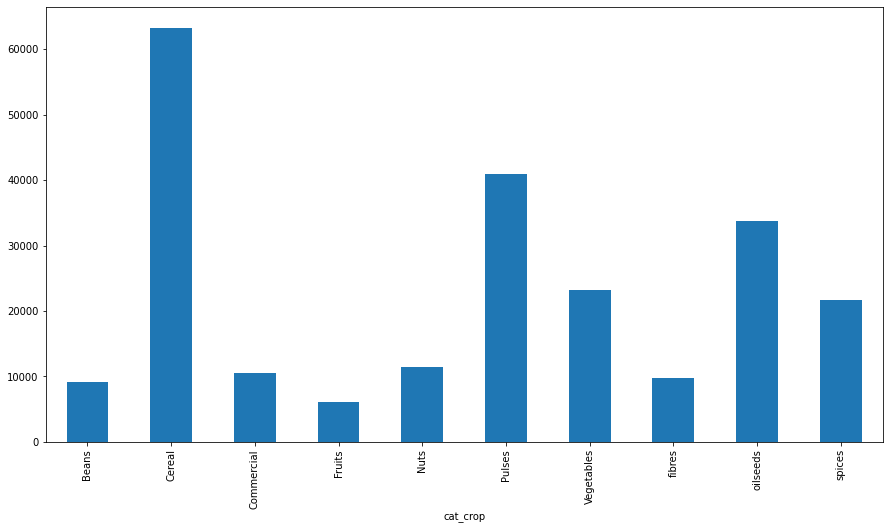

In [34]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


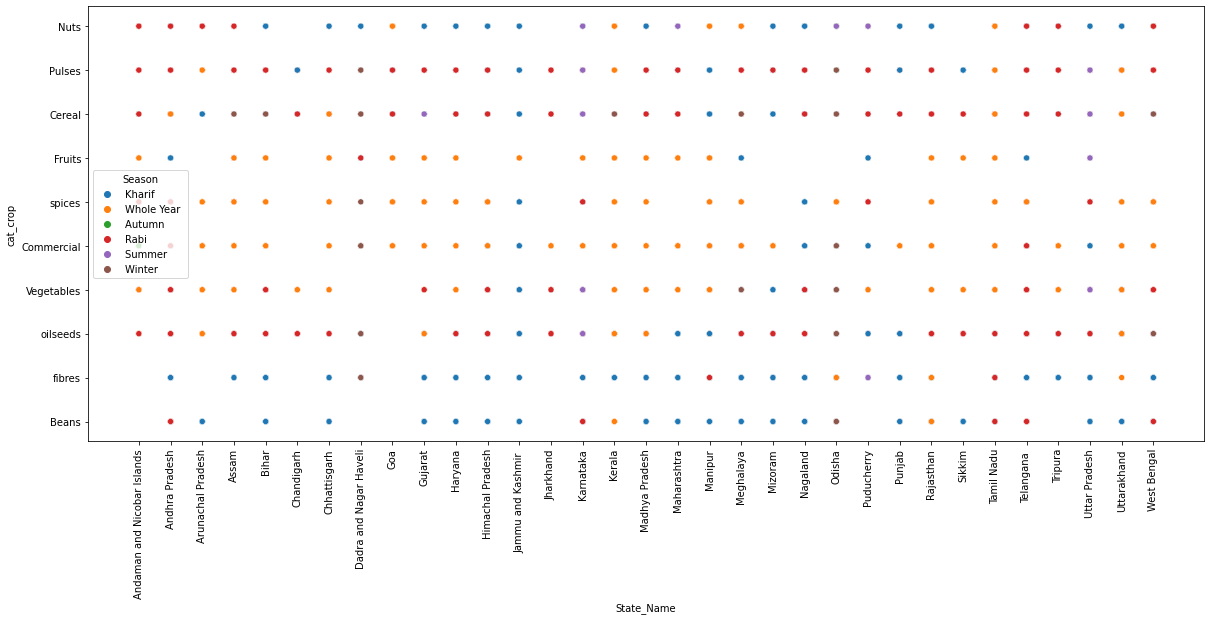

In [35]:
plt.figure(figsize=(20,8))
sn.scatterplot(data=data_explore,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

South zone: i. Top producing state Kerala shows a abundance of whole year seasonal crops

North Zone: ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

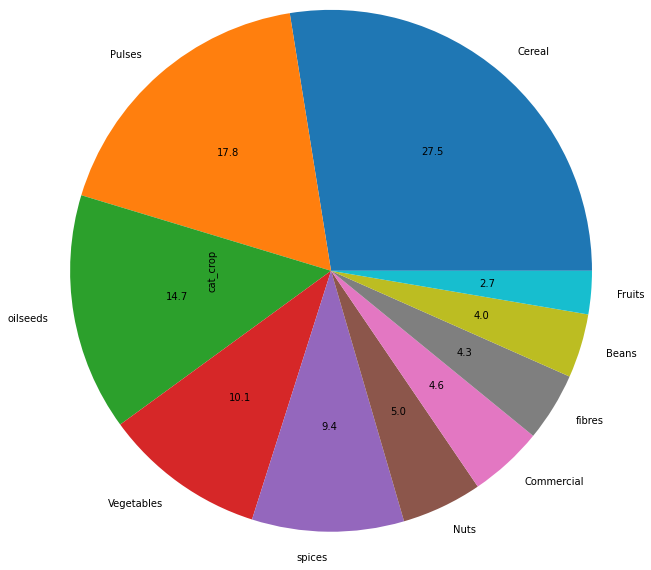

In [36]:
df1=data_explore["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [37]:
df_2 = pd.crosstab(data_explore['State_Name'], data_explore['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


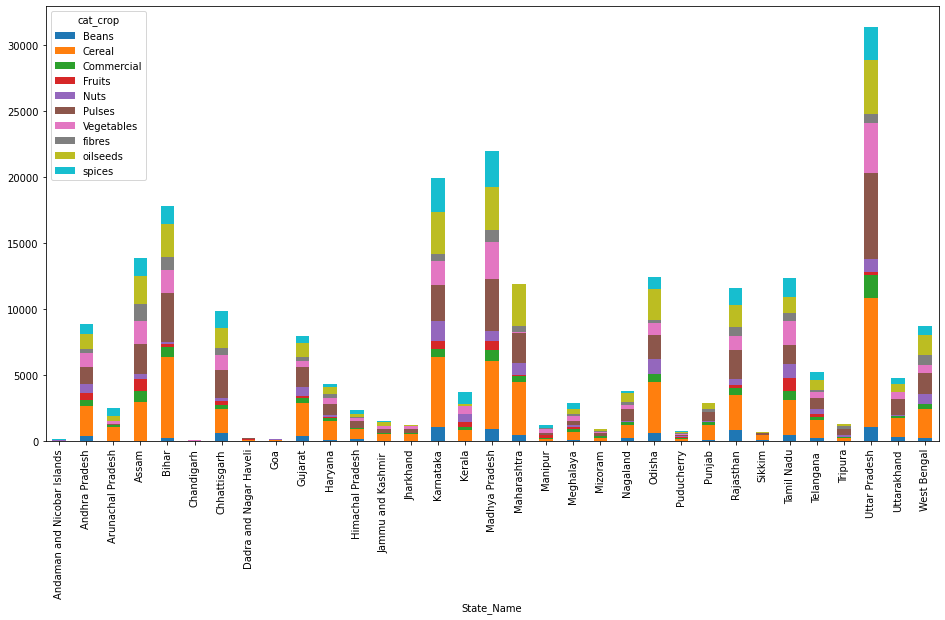

In [38]:
df_2.plot(kind='bar', stacked=True, figsize = (16,8));

In [39]:
rice_df = data_explore[data_explore["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,Union Terr,Cereal


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


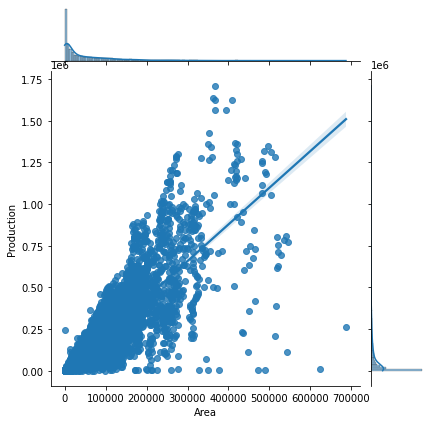

In [40]:
sn.jointplot("Area","Production",data=rice_df,kind="reg")

In [43]:
df2['arrival_date']=pd.to_datetime(df2['arrival_date'])
df2.head()

,Unnamed: 0,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,2019-04-03,6000,8000,7000
1,1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,2019-04-03,4500,5500,5000
2,2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2019-04-03,6000,8000,7000
3,3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,2019-04-03,6000,8000,7000
4,4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,2019-04-03,110000,130000,120000


([<matplotlib.patches.Wedge at 0x7f7e8fc9f5d0>,
 [Text(1.0299093539915727, 1.2891030690215046, 'Uttar Pradesh'),
  Text(-0.9994216939172946, 1.312880907671174, 'Kerala'),
  Text(-1.6150426857704008, 0.33784186114146797, 'Tamil Nadu'),
  Text(-1.5437239836434697, -0.5825944235262956, 'Punjab'),
  Text(-1.0319219753081592, -1.2874925385710425, 'Maharashtra'),
  Text(-0.27833641507809653, -1.6263544632218014, 'West Bengal'),
  Text(0.42435346571522525, -1.594498082825902, 'Gujarat'),
  Text(0.9261792974698895, -1.3655372235637455, 'Himachal Pradesh'),
  Text(1.2818310601790628, -1.038946164707402, 'Odisha'),
  Text(1.4891454551482357, -0.7105953936040922, 'Haryana'),
  Text(1.597441799727434, -0.4131339933769396, 'Assam'),
  Text(1.644558761439933, -0.1338898060763149, 'Manipur')],
 [Text(0.5617687385408577, 0.7031471285571842, '28.54%'),
  Text(-0.5451391057730697, 0.7161168587297311, '13.63%'),
  Text(-0.8809323740565821, 0.18427737880443706, '9.10%'),
  Text(-0.8420312638055287, -0.317

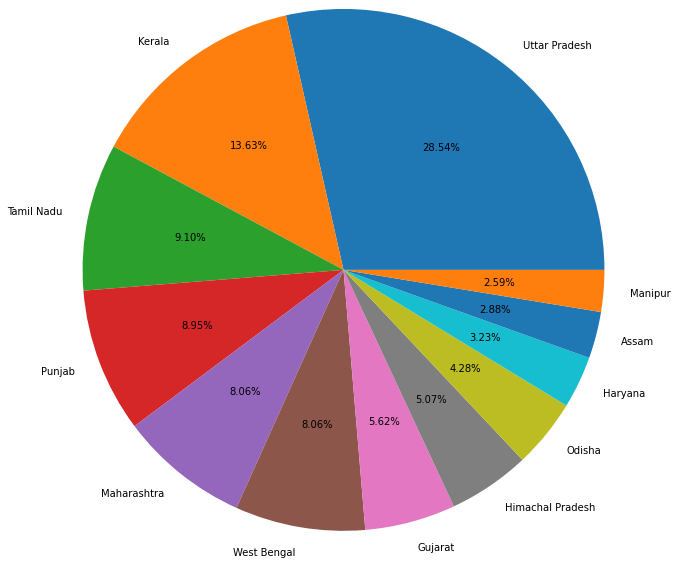

In [44]:
plt.figure(figsize=(8,8))
plt.pie(df2.state.value_counts().to_list()[:12],labels=df2.state.value_counts().index[:12],radius=1.5,autopct="%0.2f%%")

In [45]:
obj=[c for c in df2.columns if df2[c].dtype=='object']
obj

['state', 'district', 'market', 'commodity', 'variety']

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
for i in obj:
    df2[i]=le.fit_transform(df2[i])

In [49]:
df2.drop('arrival_date',axis=1,inplace=True)

In [50]:
from sklearn.preprocessing import normalize

In [51]:
data=normalize(df2)

In [56]:
x=pd.DataFrame(data,columns=df2.columns)
x

,Unnamed: 0,state,district,market,commodity,variety,min_price,max_price,modal_price
0,0.000000,0.000000,0.012531,0.020147,0.000000,0.001392,0.491400,0.655200,0.573300
1,0.000115,0.000000,0.017598,0.028296,0.001150,0.003451,0.517601,0.632623,0.575112
2,0.000164,0.000000,0.012531,0.020147,0.001474,0.003194,0.491398,0.655197,0.573297
3,0.000246,0.000000,0.012530,0.020146,0.001556,0.012120,0.491364,0.655152,0.573258
4,0.000019,0.000000,0.000734,0.001181,0.000106,0.000710,0.528016,0.624019,0.576018
...,...,...,...,...,...,...,...,...,...
2233,0.914423,0.010238,0.068387,0.047502,0.048322,0.046274,0.217037,0.233417,0.225227
2234,0.336961,0.003771,0.025189,0.017497,0.018552,0.022323,0.535458,0.550541,0.543000
2235,0.275308,0.003080,0.020571,0.031411,0.009115,0.024882,0.541993,0.566629,0.554311
2236,0.345495,0.003863,0.025804,0.039401,0.019005,0.022868,0.533075,0.548527,0.540801


In [53]:
x.shape

(2238, 9)

In [57]:
x.drop("Unnamed: 0", axis = 1, inplace = True)
x

,state,district,market,commodity,variety,min_price,max_price,modal_price
0,0.000000,0.012531,0.020147,0.000000,0.001392,0.491400,0.655200,0.573300
1,0.000000,0.017598,0.028296,0.001150,0.003451,0.517601,0.632623,0.575112
2,0.000000,0.012531,0.020147,0.001474,0.003194,0.491398,0.655197,0.573297
3,0.000000,0.012530,0.020146,0.001556,0.012120,0.491364,0.655152,0.573258
4,0.000000,0.000734,0.001181,0.000106,0.000710,0.528016,0.624019,0.576018
...,...,...,...,...,...,...,...,...
2233,0.010238,0.068387,0.047502,0.048322,0.046274,0.217037,0.233417,0.225227
2234,0.003771,0.025189,0.017497,0.018552,0.022323,0.535458,0.550541,0.543000
2235,0.003080,0.020571,0.031411,0.009115,0.024882,0.541993,0.566629,0.554311
2236,0.003863,0.025804,0.039401,0.019005,0.022868,0.533075,0.548527,0.540801


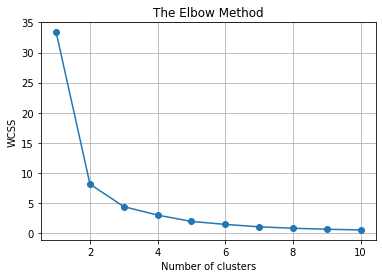

In [58]:
X = x.iloc[:,[0,7]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 1500, n_init = 20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [72]:
kmeans = KMeans(n_clusters =2, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(X)

In [73]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(score)

0.7525652740699643


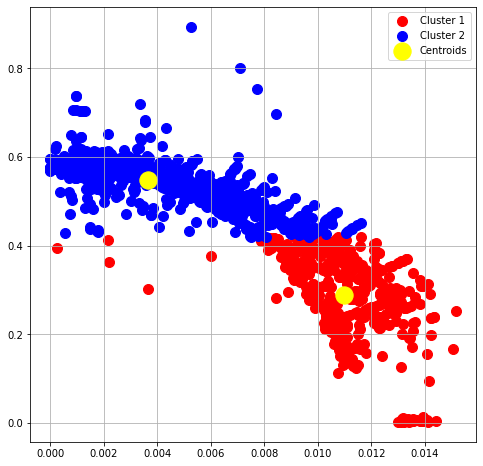

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()